# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Importing File

In [2]:
df=pd.read_csv("delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Performing EDA

First renaming the columns

In [3]:
df=df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'},axis=1)
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


Checking data types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


Checking for null values 

In [5]:
df.isnull()

,Delivery_Time,Sorting_Time
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [6]:
df.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

Checking for duplicates

In [7]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [8]:
df.duplicated().sum()

0

Describing data

In [9]:
df.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

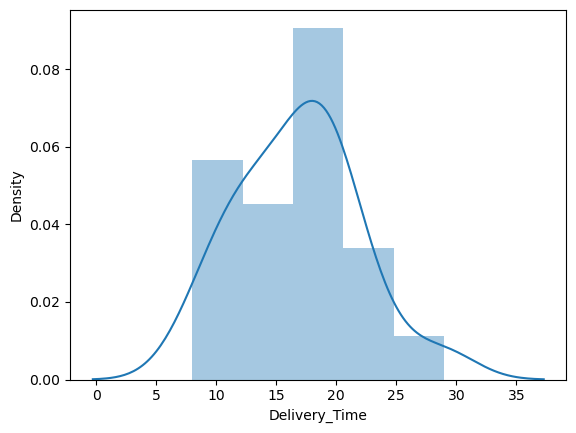

In [10]:
sns.distplot(df['Delivery_Time'])

Checking Distribution}

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

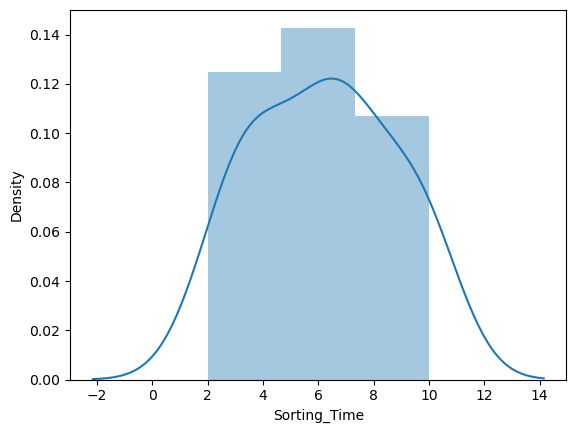

In [11]:
sns.distplot(df['Sorting_Time'])

# Checking for outliers

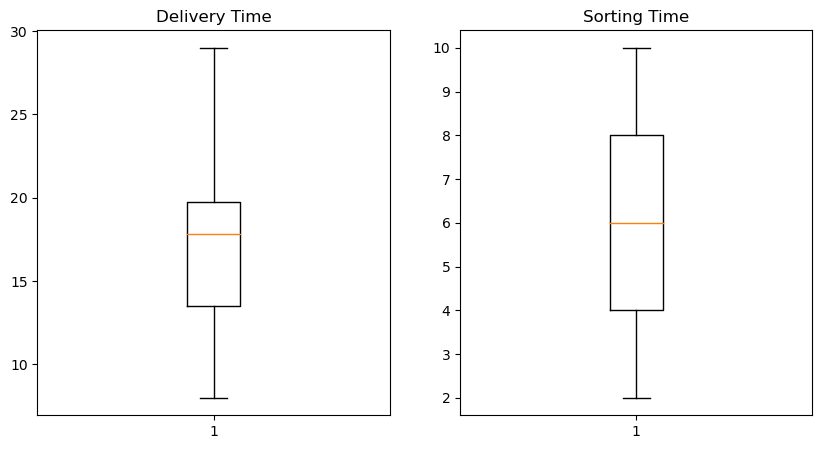

In [12]:
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(df['Delivery_Time'])
plt.title('Delivery Time')
plt.subplot(1,2,2)
plt.boxplot(df['Sorting_Time'])
plt.title('Sorting Time')
plt.show()

As we can see their are no outliers

# Correlation

In [13]:
df.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


The Correlation between Delivery time and Sorting time is positive at a good extent.

We will visulaize it with regplot

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Delivery_Time', ylabel='Sorting_Time'>

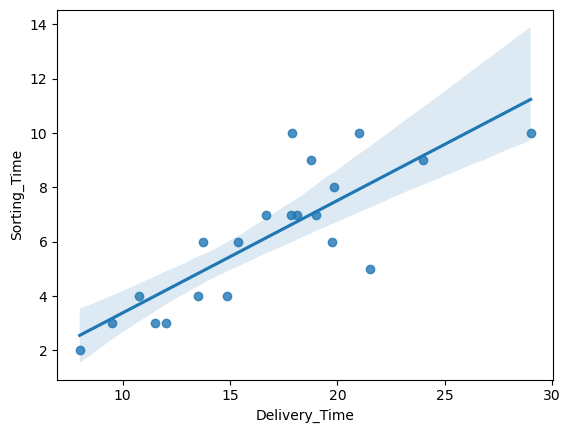

In [14]:
sns.regplot(df['Delivery_Time'],df['Sorting_Time'])

# Model Building

For Fitting Linear Regression model we are going to use ols regression (Ordinary Least Square).

It is used to estimate the relationship between the Independent variables and a Dependent variable.

OLS method helps in minimizing the sum of squares of difference between the predicted values and the actual values of the dependent variable in a straight line.

In [15]:
model = smf.ols('Delivery_Time~Sorting_Time',data=df).fit()

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        11:07:58   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we can see the statistical report.

It tells us that Dependent variable is 'Delivery_Time' (we set it). The model used ols Least Squares Method. Date and time are self explainatory :), No. of observations are 21. Df stands for 'Degree of Freedom'.

R-squared is the sum of the residuals squared. It tells us how much variation of a dependent variable is explained.
R-squared is 0.682, which should be above 0.85 to consider the model as good.
Then it provides F-statistics

In second table thier is Intercept coefficicent, Sorting Time coefficient, Standard Error, T-value and P-value of Hypothesis Testing. 0.025 and 0.975 are both measurements of values of our coefficients within 95% of our data,or within two standard deviations.

Model :  Y = Beta0 + Beta1(X)

Here we can see the model as 

Delivery_Time = (6.5827) + (1.6490)(Sorting_Time)

We can make few transformations to increase our accuracy.

In [17]:
model1=smf.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)',data=df).fit()

In [18]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Sat, 01 Apr 2023   Prob (F-statistic):           8.48e-07
Time:                            11:07:59   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model

sqrt(Delivery_Time) = (1.6135) + (1.0022)(sqrt(Sorting_Time))

Here we can see the R-squared value has incresed. But still can try other options. 

In [19]:
model2=smf.ols('np.cbrt(Delivery_Time)~np.cbrt(Sorting_Time)',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(Delivery_Time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Sat, 01 Apr 2023   Prob (F-statistic):           4.90e-07
Time:                            11:07:59   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting_Time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model3=smf.ols('np.exp(Delivery_Time)~np.exp(Sorting_Time)',data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.exp(Delivery_Time)   R-squared:                       0.274
Model:                               OLS   Adj. R-squared:                  0.235
Method:                    Least Squares   F-statistic:                     7.156
Date:                   Sat, 01 Apr 2023   Prob (F-statistic):             0.0150
Time:                           11:07:59   Log-Likelihood:                -602.95
No. Observations:                     21   AIC:                             1210.
Df Residuals:                         19   BIC:                             1212.
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -6.244e+10   1.89e+11     -0.331      0.744   -4.57e+11    3.32e+11
np.exp(Sorting_Time)   5.78e+07   2.16e+07      2.675      0.015    1.26e+07    1.03e+08
==============================================================================
Omnibus:                       29.198   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.647
Skew:                           2.162   Prob(JB):                     4.56e-16
Kurtosis:                      10.877   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
model4=smf.ols('np.log(Delivery_Time)~np.log(Sorting_Time)',data=df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Sat, 01 Apr 2023   Prob (F-statistic):           1.60e-07
Time:                           11:07:59   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we can see the R-squared is 0.77 close to 0.80. So we can stop here for now. This is the best model so far.

We will now predict Delivery time logarithimically transformed model.

# Predictions

Here we have to take exponential of Logarithmic model before implementing it because of transformation.

In [22]:
Predicted=pd.DataFrame()
Predicted['Sorting_Time']=df['Sorting_Time']
Predicted['Delivery_Time']=df['Delivery_Time']
Predicted['Predicted_Delivery_Time']=pd.DataFrame(np.exp(model4.predict(Predicted.Sorting_Time)))
Predicted

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593
